<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/verbatims_CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pickle.load( open( "/content/drive/My Drive/verbats.pkl", "rb" ) )

In [0]:
pd.set_option('display.max_colwidth', 400)

In [5]:
df['Commentaire'].astype(str).map(len).max()

4891

In [6]:
df.head(20)

,Revenir_R,Commentaire
0,0,Séjour toujours très agréable même si les forfaits de ski deviennent de plus en plus chers......
2,0,Toujours un plaisir
3,0,"cela fait + de 40 ans que je viens à Tignes, pour moi c'est le meilleur ski de France, jamais déçu."
4,0,Séjour agréable
5,0,Bien mais très cher
6,0,"Excellente de par la situation de la station, son enneigement, sa qualité d accueil et la diversité des activités proposées. Tellement dommage que sur les périodes où il y a moins d affluence (hors période vacances) , la station fait des économies et réduit son personnel, essentiellement sur remontées et ouverture pistes"
7,0,Week-end en ouverture de saison top
8,2,séjour top avec beaucoup de chance grâce à une météo de rêve et une neige excellente
10,2,problème d'acces et station sympa ski de bonne qualité
12,0,Très bonne station!


In [0]:
from fastai.text import *

# Tokenize : Séparer le texte en mots

In [8]:
import nltk
import nltk.data
nltk.download('punkt')
# chargement du tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/PY3/french.pickle')
#tokens = tokenizer.tokenize("Jadis, une nuit, je fus un papillon, voltigeant, content de son sort. Puis, je m’éveillai, étant Tchouang-tseu. Qui suis-je en réalité ? Un papillon qui rêve qu’il est Tchouang-tseu ou Tchouang qui s’imagine qu’il fut papillon ?")

from nltk.tokenize import RegexpTokenizer 
tokenizer = RegexpTokenizer(r'\w+')
                            
df["Commentaire"] = df["Commentaire"].apply(lambda x: tokenizer.tokenize(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df.head(20)

,Revenir_R,Commentaire
0,0,"[séjour, toujours, très, agréable, même, si, les, forfaits, de, ski, deviennent, de, plus, en, plus, chers]"
2,0,"[toujours, un, plaisir]"
3,0,"[cela, fait, de, 40, ans, que, je, viens, à, tignes, pour, moi, c, est, le, meilleur, ski, de, france, jamais, déçu]"
4,0,"[séjour, agréable]"
5,0,"[bien, mais, très, cher]"
6,0,"[excellente, de, par, la, situation, de, la, station, son, enneigement, sa, qualité, d, accueil, et, la, diversité, des, activités, proposées, tellement, dommage, que, sur, les, périodes, où, il, y, a, moins, d, affluence, hors, période, vacances, la, station, fait, des, économies, et, réduit, son, personnel, essentiellement, sur, remontées, et, ouverture, pistes]"
7,0,"[week, end, en, ouverture, de, saison, top]"
8,2,"[séjour, top, avec, beaucoup, de, chance, grâce, à, une, météo, de, rêve, et, une, neige, excellente]"
10,2,"[problème, d, acces, et, station, sympa, ski, de, bonne, qualité]"
12,0,"[très, bonne, station]"


# Stop words

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words("french")]
  return words

#dataset['description'].apply(lambda x: [item for item in x if item not in stop])
df['text_no_stop'] = df['Commentaire'].apply(lambda x: remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df.head(5)

,Revenir_R,Commentaire,text_no_stop,text_lemmatized
0,0,"[séjour, toujours, très, agréable, même, si, les, forfaits, de, ski, deviennent, de, plus, en, plus, chers]","[séjour, toujours, très, agréable, si, forfaits, ski, deviennent, plus, plus, chers]","[séjour, toujours, très, agréable, si, forfaits, ski, deviennent, plus, plus, chers]"
2,0,"[toujours, un, plaisir]","[toujours, plaisir]","[toujours, plaisir]"
3,0,"[cela, fait, de, 40, ans, que, je, viens, à, tignes, pour, moi, c, est, le, meilleur, ski, de, france, jamais, déçu]","[cela, fait, 40, ans, viens, tignes, meilleur, ski, france, jamais, déçu]","[cela, fait, 40, an, viens, tignes, meilleur, ski, france, jamais, déçu]"
4,0,"[séjour, agréable]","[séjour, agréable]","[séjour, agréable]"
5,0,"[bien, mais, très, cher]","[bien, très, cher]","[bien, très, cher]"


In [25]:
df.isna().sum()

Revenir_R       0
Commentaire     0
text_no_stop    0
dtype: int64

# Wordcloud

In [0]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [0]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

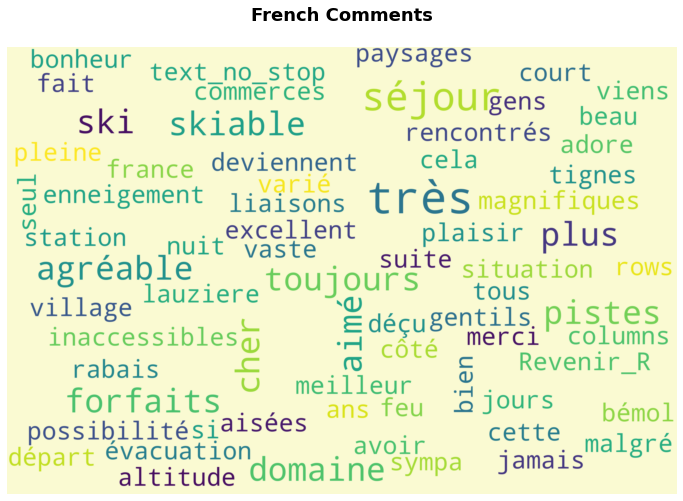

In [33]:
wordcloud = WordCloud(max_font_size=200, max_words=150, background_color="lightgoldenrodyellow",
                      #width=1600, height=800,
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df))

plot_wordcloud(wordcloud, 'French')

# Sentiment analysis
https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data

In [0]:
df1 = pickle.load( open( "/content/drive/My Drive/verbats.pkl", "rb" ) )

In [40]:
! pip install twython

In [43]:
import twython
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [0]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [0]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [0]:
df1['sentiment_neg'] = df1['Commentaire'].apply(negative_score)
df1['sentiment_neu'] = df1['Commentaire'].apply(neutral_score)
df1['sentiment_pos'] = df1['Commentaire'].apply(positive_score)
df1['sentiment_compound'] = df1['Commentaire'].apply(compound_score)

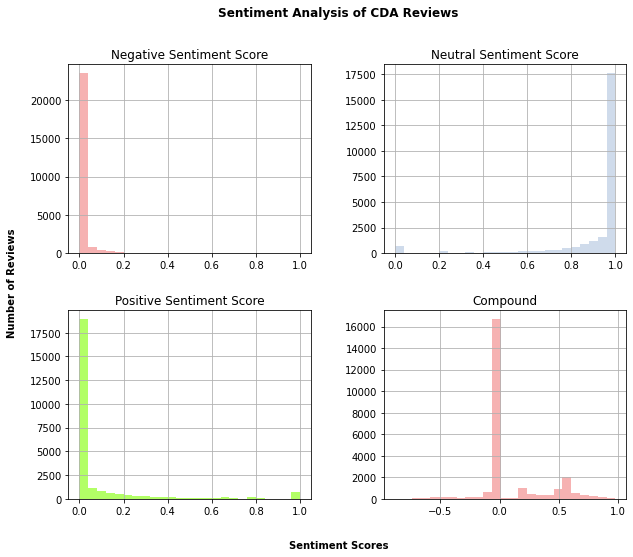

In [58]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df1.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df1.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df1.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df1.hist('sentiment_compound', bins=25, ax=axes[1,1], color='lightcoral', alpha=0.6)
axes[1,1].set_title('Compound')
# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of CDA Reviews', fontsize=12, fontweight='bold');

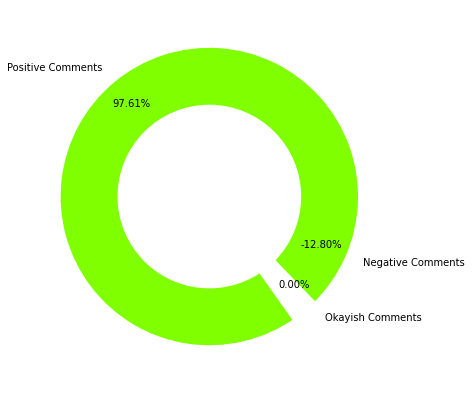

In [63]:
percentiles = df1.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'yellow', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

<Figure size 432x288 with 0 Axes>

In [66]:
# full dataframe with POSITIVE comments
df_pos = df1.loc[df1.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['Commentaire'].tolist()

# full dataframe with NEGATIVE comments
df_neg = df1.loc[df1.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['Commentaire'].tolist()

df_pos['text_length'] = df_pos['Commentaire'].apply(len)
df_neg['text_length'] = df_neg['Commentaire'].apply(len)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


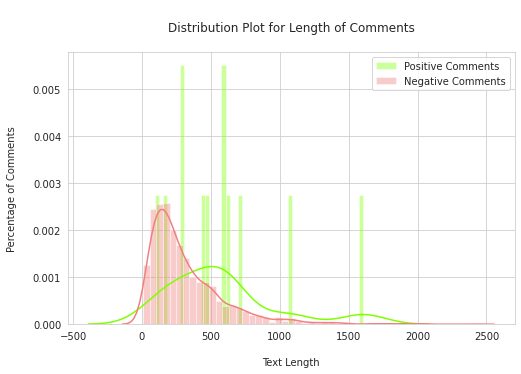

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [0]:
# read some positive comments
pos_comments[10:15]
# read some negative comments
neg_comments[10:15]

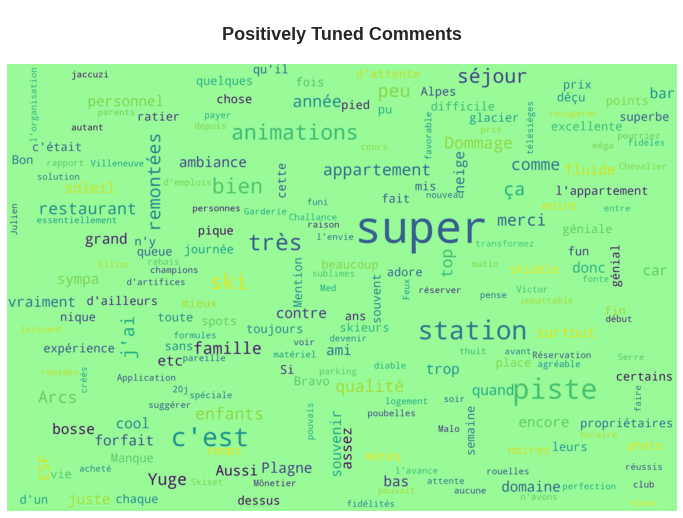

In [95]:
stopwordsf = nltk.corpus.stopwords.words('french')
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords=stopwordsf).generate(str(df_pos.Commentaire.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')


In [70]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


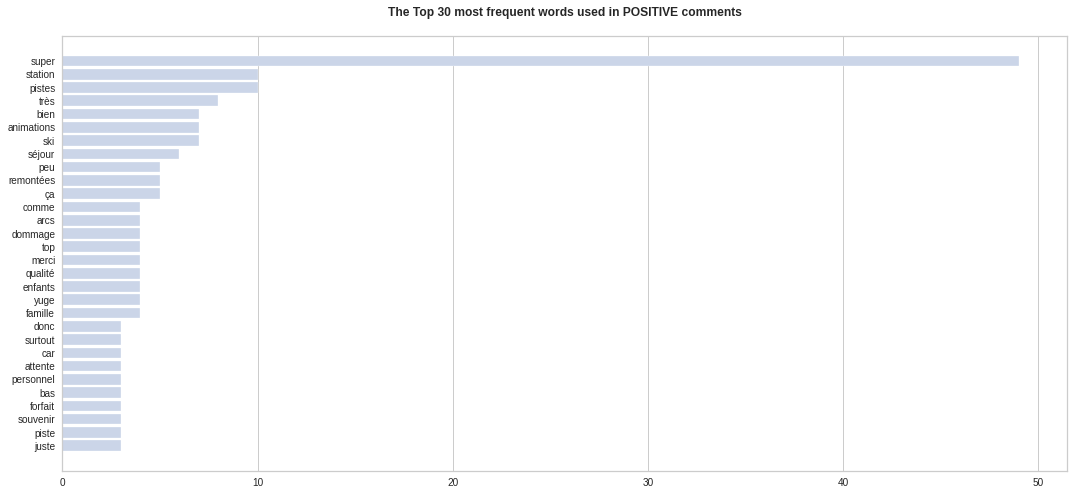

In [85]:
# vectorizing text
stopwordsf = nltk.corpus.stopwords.words('french')
vectorizer = CountVectorizer(stop_words=stopwordsf)
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

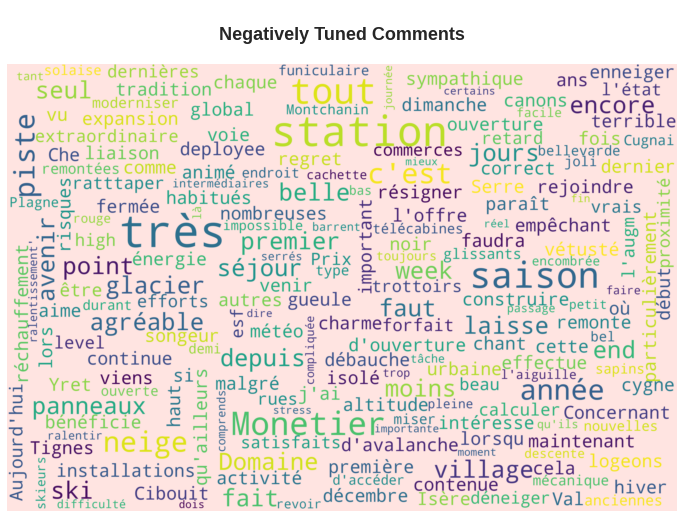

In [96]:
stopwordsf = nltk.corpus.stopwords.words('french')
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      width=3000, height=2000,
                      stopwords=stopwordsf).generate(str(df_neg.Commentaire.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

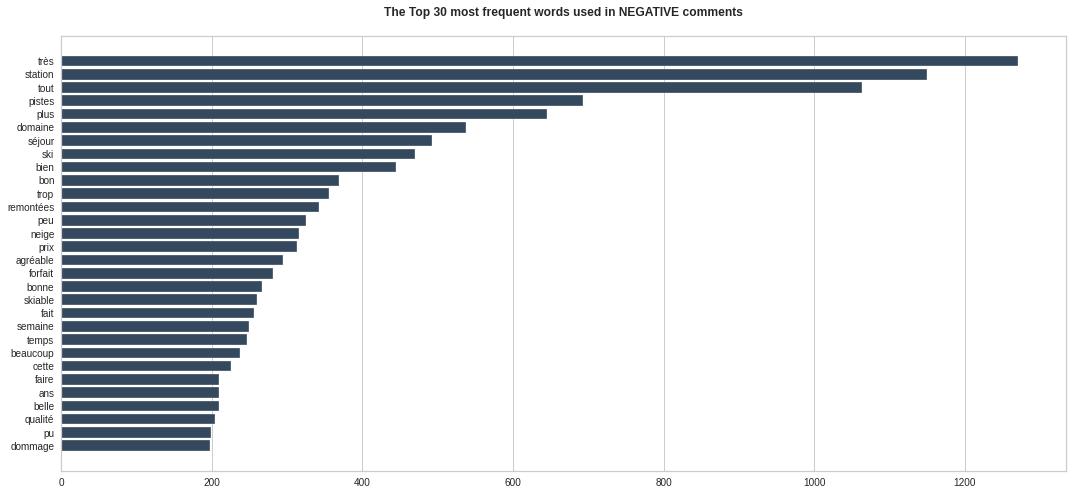

In [97]:
# vectorizing text
stopwordsf = nltk.corpus.stopwords.words('french')
vectorizer = CountVectorizer(stop_words=stopwordsf)
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# Modélisation des sujets

Positifs

In [0]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
# prepare the preprocessing
stop = set(nltk.corpus.stopwords.words('french'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


In [100]:
nltk.download('wordnet')
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [102]:
# First, we create a Gensim dictionary from the normalized data, then we convert this to a bag-of-words corpus, and save both dictionary and corpus for future use.
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.032*"super" + 0.016*"piste" + 0.014*"très" + 0.014*"station"')
(1, '0.070*"super" + 0.009*"séjour" + 0.009*"restaurant" + 0.009*"ski"')
(2, '0.020*"a" + 0.017*"piste" + 0.014*"super" + 0.014*"cest"')


In [103]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model5.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.036*"super" + 0.016*"piste" + 0.016*"bien" + 0.011*"personnel"')
(1, '0.023*"super" + 0.015*"très" + 0.015*"peu" + 0.012*"cest"')
(2, '0.103*"super" + 0.014*"ski" + 0.014*"restaurant" + 0.011*"station"')
(3, '0.002*"super" + 0.002*"piste" + 0.002*"station" + 0.002*"a"')
(4, '0.022*"a" + 0.019*"cest" + 0.019*"piste" + 0.019*"super"')


In [104]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model10.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.145*"super" + 0.028*"ski" + 0.019*"restaurant" + 0.019*"skieurs"')
(1, '0.044*"super" + 0.022*"peu" + 0.017*"très" + 0.017*"piste"')
(2, '0.064*"super" + 0.020*"bien" + 0.015*"personnel" + 0.015*"piste"')
(3, '0.002*"enfants" + 0.002*"aussi" + 0.002*"super" + 0.002*"cest"')
(4, '0.039*"super" + 0.029*"station" + 0.029*"qualité" + 0.020*"etc"')
(5, '0.002*"station" + 0.002*"a" + 0.002*"piste" + 0.002*"cest"')
(6, '0.018*"bar" + 0.018*"jai" + 0.018*"station" + 0.018*"super"')
(7, '0.002*"a" + 0.002*"super" + 0.002*"piste" + 0.002*"station"')
(8, '0.029*"a" + 0.024*"piste" + 0.019*"super" + 0.019*"cest"')
(9, '0.027*"enfants" + 0.027*"aussi" + 0.018*"super" + 0.018*"cest"')


In [0]:
# Pour une sortie plus graphique - Mais marche seulement en local
dictionary = gensim.corpora.Dictionary.load('../input/sentimentData/dictionary.gensim')
corpus = pickle.load(open('../input/sentimentData/corpus.pkl', 'rb'))
import pyLDAvis.gensim
# visualizing 5 topics
lda = gensim.models.ldamodel.LdaModel.load('../input/sentimentData/model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [107]:
# Sujets négatifs
doc_clean = [clean(comment).split() for comment in neg_comments]

from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model10.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.011*"plus" + 0.009*"a" + 0.007*"domaine" + 0.006*"cest"')
(1, '0.043*"très" + 0.035*"tout" + 0.018*"séjour" + 0.017*"station"')
(2, '0.020*"très" + 0.020*"station" + 0.015*"piste" + 0.013*"tout"')
(3, '0.016*"station" + 0.016*"a" + 0.013*"plus" + 0.011*"piste"')
(4, '0.015*"tout" + 0.008*"bien" + 0.005*"trop" + 0.005*"saison"')
(5, '0.019*"très" + 0.017*"piste" + 0.017*"tout" + 0.013*"station"')
(6, '0.013*"piste" + 0.013*"a" + 0.013*"tout" + 0.013*"séjour"')
(7, '0.021*"station" + 0.021*"très" + 0.018*"piste" + 0.016*"plus"')
(8, '0.031*"station" + 0.018*"tout" + 0.013*"très" + 0.013*"a"')
(9, '0.017*"très" + 0.016*"station" + 0.014*"plus" + 0.012*"a"')


Faire corrélation positif négatif puis modéliser +/- sur les mots

# TFIDF

In [0]:
mask = np.random.rand(len(df)) < 0.8
X_train = df[mask]
X_test = df[~mask]

In [0]:
def TFIDF(X_train, X_test, MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with", str(np.array(X_train).shape[1]), "features")
    return (X_train, X_test)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
X_train,X_test = TFIDF(X_train,X_test)

tf-idf with 3 features


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

print("train with old features: ",np.array(X_train).shape)
print("train with new features:" ,np.array(X_train_new).shape)

print("test with old features: ",np.array(X_test).shape)
print("test with new features:" ,np.array(X_test_new).shape)

train with old features:  (3, 3)
train with new features: (3, 2)
test with old features:  (3, 3)
test with new features: (3, 2)


In [0]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_corpora():
corpora = defaultdict(list)

# Création d'un corpus de tokens
corpora[artiste] += tokenizer.tokenize(df[text_no_stop].decode('utf-8').lower())

stats, freq = dict(), dict()

for k, v in corpora.iteritems():
freq[k] = fq = nltk.FreqDist(v)
stats[k] = {'total': len(v)} 
return (freq, stats, corpora)

# Récupération des comptages
freq, stats, corpora = freq_stats_corpora()
df = pd.DataFrame.from_dict(stats, orient='index')

# Affichage des fréquences
df.sort(columns='total', ascending=False)
df.plot(kind='bar', color="#f56900", title='Top 50 Rappeurs par nombre de mots')

In [0]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus
freq_totale = nltk.Counter()
for k, v in df[text_no_stop].iteritems():
 freq_totale += freq[k]

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
most_freq = zip(*freq2.most_common(100))[0]

# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
#sw = set()
#sw.update(stopwords)
#sw.update(tuple(nltk.corpus.stopwords.words('french')))

# Lemmatisation : Donner forme canonique des mots (racines)

In [0]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
#tokens = word_tokenize(file)
french_stem = [stemmer.stem(word) for word in word_tokenize(df[text_no_stop])]
stemmed_text = ' '.join([stemmer.stem(word) for word in word_tokenize(text_no_stop)])
  
#lemmatizer = nltk.WordNetLemmatizer()
#def lemmatize_text(text):
#  lem_text = [lemmatizer.lemmatize(i) for i in text]
#  return lem_text

#df['text_lemmatized'] = df["text_no_stop"].apply(lambda x: lemmatize_text(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: ignored

In [0]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

In [0]:
df_test.shape

(4930, 2)

# Entrainement du modèle sur le **vocabulaire**

In [0]:
# Prédiction mots model data
data_lm = TextLMDataBunch.from_df(Path(),
                                  train_df = df_train,
                                  valid_df = df_test,
                                  text_cols = 'Commentaire', 
                                  label_cols= "Revenir_R",
                                  tokenizer= Tokenizer(lang="fr")
                                  )

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,6.168536,5.142889,0.170778,00:22
1,5.108332,4.660267,0.205727,00:23
2,4.854033,4.582366,0.211499,00:23


In [0]:
learn.predict("J'aime mon séjour", n_words=10)

"J'aime mon séjour ! , tres nouvelles expérience , comme Juste nous"

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.482893,4.136363,0.246505,00:32
1,4.195074,4.018757,0.256658,00:32


In [0]:
learn.predict("J'aime", n_words=10)

"J'aime la station entre amis , dommage que le parking est"

# **Classification selon les intentions**

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(Path(),
                                  train_df = df_train,
                                  valid_df = df_test,
                                  text_cols = 'Commentaire', 
                                  label_cols= "Revenir_R",
                                  tokenizer= Tokenizer(lang="fr"),
                                  vocab = data_lm.train_ds.vocab
                                  )

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj madame , xxmaj monsieur , xxmaj je vous remercie de nous permettre de vous transmettre nos impressions sur notre séjour à xxmaj chantemerle . xxmaj temps globalement ensoleillé , xxunk de qqs chutes de neige même si l' enneigement n' était pas optimal en ce début de mars . xxmaj deuxième séjour hebdomadaire à xxmaj chantemerle après février 2018 . xxmaj qqs évolutions satisfaisantes avec le changement de",1
"xxbos xxmaj belle station , beau domaine mais manque d' infos sur l' appli mobile ( par exemple la fermeture de la station lundi 4 mars sans aucune explication ) cette appli est vraiment nulle . xxmaj et le personnel aux remontées est très inégal : en général bras croisés alors que les queues étaient dingues et que les sièges étaient assez à moitié remplis une honte ! xxmaj ceux",2
"xxbos xxmaj ma famille vient aux arcs tous les ans depuis toujours . xxmaj pour moi c' etait la 1ere fois . xxmaj station sympathique mais le manque de diversité de niveau sur les pistes est flagrante . xxmaj nous avons beaucoup aimé les petits plus type photo dans les télésièges , le wifi partout sur le domaine . xxmaj manque de toilettes ( mention + + à ceux de",1
"xxbos xxmaj si vous ne voulez pas faire de dépenses je vous conseille d' ouvrir la station qu' à partir de la semaine de xxmaj noël ? car xxmaj je trouve xxup inadmissible que volontairement et malgré les bonnes conditions d' enseignement , seulement 50 % du domaine skiable soit ouvert et 50 % des remontées mécaniques fonctionnent à une semaine de xxmaj noël ( secteur xxmaj fée , secteur",1
xxbos xxup c' etait un très bon séjour au niveau partage avec ma famille mais au niveau de la station il y a à mon sens de réels soucis . xxmaj il y a très peu de restaurant à xxmaj arc 1600 et ceux présents sont malheureusement pas d' une qualité incroyable . xxmaj ensuite au niveau du domaine skiable en général il est très bien entretenu sur ce point,1


In [0]:
classifier = text_classifier_learner(data_clas, AWD_LSTM)

In [0]:
classifier.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.867561,0.847278,0.640771,00:20
1,0.825762,0.847132,0.640771,00:17
2,0.823413,0.849776,0.640771,00:17
3,0.840665,0.843740,0.640771,00:17
4,0.845016,0.842470,0.640771,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 7.59E-08


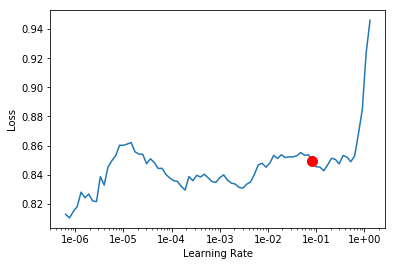

In [0]:
classifier.lr_find()
classifier.recorder.plot(suggestion = True)

In [0]:
classifier.unfreeze()

In [0]:
classifier.fit_one_cycle(4, 1.0E-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.829811,0.842739,0.640771,00:51
1,0.810706,0.817688,0.640771,00:41
2,0.806274,0.799627,0.640771,00:42
3,0.793640,0.801732,0.641176,00:44


In [0]:
classifier.predict

In [0]:
interp = ClassificationInterpretation.from_learner(classifier)

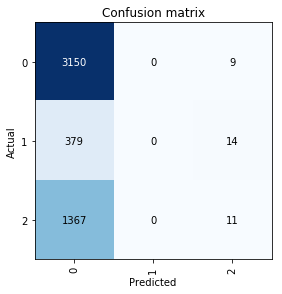

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp_text = TextClassificationInterpretation.from_learner(classifier)

In [0]:
interp_text.show_top_losses(k=10)

Text,Prediction,Actual,Loss,Probability
"xxbos nous avons eu la chance d' avoir une météo ensoleillée cette semaine , nous avons pu profité pleinement du domaine skiable , de la terrasse du chalet de l' arc . le point négatif que je peux mettre en avant est la déception de devoir monter des escaliers pour aller à la première remontée mécanique , c' est jamais simple avec de jeunes enfant qui n' ont pas leur",0,2,3.75,0.13
"xxbos xxmaj xxunk belle semaine ensoleillée , bon accueil et accès aux pistes facile . xxmaj temps d' attente aux télésiège long et installations parfois vétustes . xxmaj panorama magnifique .",0,2,3.68,0.13
xxbos xxmaj une station qui se développe ! xxmaj mais il ne faut pas trop non plus pour garder son côté chaleureux et non trop commercial xxmaj les carroz est une station familiale qu' il faut conserver,0,0,3.67,0.84
"xxbos xxmaj belle station , cependant manque de pistes techniques ( rouge et noir ) .",0,2,3.52,0.15
xxbos xxmaj parfait,0,0,3.50,0.82
"xxbos station mal xxunk au niveau de la navette , en etant a 1800 il n' y a pas de navette apres 19h30 pour manger au restaurant cest pas possible ! il faut rentrer a pieds beaucoup trop de liaison sur le domaine ou il faut pousser , en ski moyen mais en snow xxrep 7 ! remontees tres vieilles et beaucoup trop d' attente aux remontees en bas comme",0,1,3.44,0.03
xxbos xxmaj très belle station avec un beaux domaine skiable nous avons passé un agréable séjour,0,0,3.24,0.78
"xxbos xxmaj très chouette station bien entretenue , le personnel est très serviable et sympathique . xxup d' excellents moments entre amis avec une ambiance géniale . xxmaj et un tout grand merci aux moniteurs de xxmaj ski xxmaj xxunk et xxmaj stéphane de l' xxup esf pour leurs cours et leurs explications sur le domaine",0,0,3.17,0.76
"xxbos xxmaj station xxunk pendant les vacance scolaires . 2 remontées mécaniques xxunk pour démarrer de 1800 ! xxmaj une honte . idem le xxmaj dahu . xxmaj avec les skieurs , c' est inutilisable . xxmaj vous attendez une 1 / 2 heure avec un enfant après les cours . xxmaj bravo . xxmaj boulangerie xxunk . pas un xxunk digne de ce nom . xxmaj restaurant mal xxunk",0,0,3.10,0.75
xxbos xxmaj bon séjour mais forfait trop xxunk que le parking du funiculaire soit payant station des arcs inadaptée aux petits enfants qui débutent le ski,0,0,3.07,0.74


In [0]:
df_test.iloc[10:20, 0]

53     0
63     0
66     0
69     0
75     0
94     0
99     0
107    2
117    0
118    0
Name: Revenir_R, dtype: int32

In [0]:
interp_text.show_intrinsic_attention(df_test.iloc[10:20, 0])

In [0]:
random_reviews = np.random.randn(len(df))<0.99

interp_text.show_intrinsic_attention(df[~random_reviews]["Commentaire"])

In [0]:
interp_text.confusion_matrix(slice_size=3)